In [50]:

## decay vs gini index 

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from statannot import add_stat_annotation 

In [ ]:
## 1. Fig3j --- ----

In [7]:
# produce gini index--

def gini_vector(arr):
    # arr = arr.to_numpy()
    arr = np.array(arr.dropna())
    # arr = np.array(arr)
    # first sort
    sorted_arr = arr.copy()
    sorted_arr.sort()
    n = arr.size
    if n == 0:
        return np.nan
    coef_ = 2. / n
    const_ = (n + 1.) / n
    weighted_sum = sum([(i+1)*yi for i, yi in enumerate(sorted_arr)])
    return coef_*weighted_sum/(sorted_arr.sum()) - const_

/tmp/ipykernel_16608/125205900.py:3: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  decay[['transcript','gene']] = decay['Name'].str.split('::',1,expand = True)
/tmp/ipykernel_16608/125205900.py:12: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  aver[['gene','window_start','window_end']] = aver['idd'].str.split('_',2,expand = True)


/tmp/ipykernel_16608/125205900.py:20: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  gini[['Name','window']] =  gini['idd'].str.split('_',1,expand = True)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


>=60(mins)    937
<60(mins)     149
Name: halflife_30C, dtype: int64
>=60(mins)    937
<60(mins)     149
Name: halflife_30C, dtype: int64
1086
<60(mins) v.s. >=60(mins): Mann-Whitney-Wilcoxon test smaller, P_val=1.492e-03 U_stat=5.970e+02


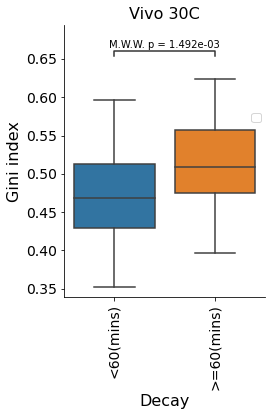

In [8]:
out = '/home/han/proj_het_AC/rerun_analysis/0_Manuscript_codes_submission_20250723/Figure3/Data/'
decay=pd.read_csv(out+'final_30C_37C_classify_fast_vs_slower_allinfo',sep='\t')
decay[['transcript','gene']] = decay['Name'].str.split('::',1,expand = True)

dir1 = '/home/han/proj_het_AC/rerun_analysis/0_Manuscript_codes_submission_20250723/Figure3/Data/'
mod1 = pd.read_csv(dir1+'mod_rate_all_30C.txt', header=None,sep='\t')
mod1.columns = ['position', 'mut', 'coverage','mutrate','temp','region','id','idd','rep']
mod1['id_pos'] = mod1['id'] + ':' + mod1['position'].astype(str)

aver = mod1.groupby([ 'idd', 'region','position'])['mutrate'].mean()
aver = aver.reset_index()
aver[['gene','window_start','window_end']] = aver['idd'].str.split('_',2,expand = True)
mod1=aver

mod1.index = mod1.idd
mod1 = mod1.drop('idd', axis=1)
mod1 = mod1[['mutrate']]
gini = mod1.dropna(subset=["mutrate"]).groupby("idd").apply(lambda x: x.apply(gini_vector,axis=0)) # apply gini vector column wise
gini = gini.reset_index()
gini[['Name','window']] =  gini['idd'].str.split('_',1,expand = True)
gini.columns = ['idd', 'gini_index', 'Name', 'window']


gini_gene = gini

### C. merge decay and gini index  

merge = pd.merge(decay,gini_gene,how='outer',on=['Name','Name'])
merge['halflife_30C'] = merge['halflife_x']
dplot = merge
dplot['halflife_30C'] = np.where((dplot['halflife_30C'] == '20.0') | (dplot['halflife_30C'] == '40.0'), '<60(mins)', dplot['halflife_30C'])
dplot['halflife_30C'] = np.where((dplot['halflife_30C'] == '60.0') | (dplot['halflife_30C'] == '120.0') | (dplot['halflife_30C'] == '>120'), '>=60(mins)', dplot['halflife_30C'])
print(dplot.halflife_30C.value_counts())


### D. plot gini index 

print(dplot.halflife_30C.value_counts())
flt = dplot[dplot['halflife_30C'].notnull()]
print(flt.shape[0]) 

plt.figure(figsize=(3.6,5))

order = ['<60(mins)','>=60(mins)']
ax = sns.boxplot(data=dplot, x='halflife_30C',y='gini_index',order = order, showfliers = False, dodge=False)  # order = order
plt.title('Vivo 30C',fontsize = 16)
plt.xlabel('Decay',fontsize = 16) 
plt.ylabel('Gini index',fontsize = 16)
plt.xticks(fontsize = 14,rotation=90) 
plt.yticks(fontsize = 14) 
plt.legend(loc='best', bbox_to_anchor=(1.01, 0.7),prop={'size': 12})
ax.spines[['right', 'top']].set_visible(False) 

add_stat_annotation(ax, data=dplot, x='halflife_30C',y='gini_index',
                    box_pairs = [('<60(mins)','>=60(mins)')],
                    comparisons_correction = None,
                    test="Mann-Whitney-ls",text_format='full', loc='inside', line_offset_to_box=0.1, verbose=3)  

dir_out = '/home/han/proj_het_AC/rerun_analysis/0_Manuscript_codes_submission_20250723/Figure3/Data/'
plt.savefig(dir_out+'Fig3j_vivo_30C_gini_index.pdf',bbox_inches='tight', dpi=300)

In [60]:
### gini 37C ---

/tmp/ipykernel_16608/1299655253.py:8: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  aver[['gene','window_start','window_end']] = aver['idd'].str.split('_',2,expand = True)
/tmp/ipykernel_16608/1299655253.py:16: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  gini[['Name','window']] =  gini['idd'].str.split('_',1,expand = True)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


>=60(mins)    1239
<60(mins)     1004
Name: halflife_37C, dtype: int64
>=60(mins)    1239
<60(mins)     1004
Name: halflife_37C, dtype: int64
2243
<60(mins) v.s. >=60(mins): Mann-Whitney-Wilcoxon test smaller, P_val=1.084e-04 U_stat=6.480e+03


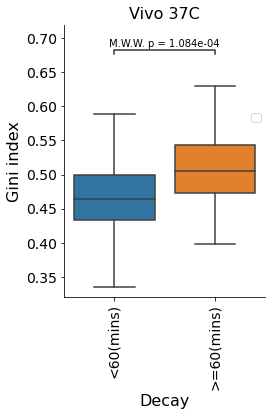

In [9]:
dir1 = '/home/han/proj_het_AC/rerun_analysis/0_Manuscript_codes_submission_20250723/Figure3/Data/'
mod1 = pd.read_csv(dir1+'mod_rate_all_37C.txt', header=None,sep='\t')
mod1.columns = ['position', 'mut', 'coverage','mutrate','temp','region','id','idd','rep']
mod1['id_pos'] = mod1['id'] + ':' + mod1['position'].astype(str)

aver = mod1.groupby([ 'idd', 'region','position'])['mutrate'].mean()
aver = aver.reset_index()
aver[['gene','window_start','window_end']] = aver['idd'].str.split('_',2,expand = True)
mod1=aver

mod1.index = mod1.idd
mod1 = mod1.drop('idd', axis=1)
mod1 = mod1[['mutrate']]
gini = mod1.dropna(subset=["mutrate"]).groupby("idd").apply(lambda x: x.apply(gini_vector,axis=0)) # apply gini vector column wise
gini = gini.reset_index()
gini[['Name','window']] =  gini['idd'].str.split('_',1,expand = True)
gini.columns = ['idd', 'gini_index', 'Name', 'window']
gini_gene = gini

merge = pd.merge(decay,gini_gene,how='left',on=['Name','Name'])
merge['halflife_37C'] = merge['halflife_y']
dplot = merge
dplot['halflife_37C'] = np.where((dplot['halflife_37C'] == '20.0') | (dplot['halflife_37C'] == '40.0'), '<60(mins)', dplot['halflife_37C'])
dplot['halflife_37C'] = np.where((dplot['halflife_37C'] == '60.0') | (dplot['halflife_37C'] == '120.0') | (dplot['halflife_37C'] == '>120'), '>=60(mins)', dplot['halflife_37C'])
print(dplot.halflife_37C.value_counts())


### plot gini index 

print(dplot.halflife_37C.value_counts())
flt = dplot[dplot['halflife_37C'].notnull()]
print(flt.shape[0]) 

plt.figure(figsize=(3.6,5))

order = ['<60(mins)','>=60(mins)']
ax = sns.boxplot(data=dplot, x='halflife_37C',y='gini_index',order = order, showfliers = False, dodge=False)  
plt.title('Vivo 37C',fontsize = 16)
plt.xlabel('Decay',fontsize = 16) 
plt.ylabel('Gini index',fontsize = 16)
plt.xticks(fontsize = 14,rotation=90) 
plt.yticks(fontsize = 14) 
plt.legend(loc='best', bbox_to_anchor=(1.01, 0.7),prop={'size': 12})
ax.spines[['right', 'top']].set_visible(False) 

add_stat_annotation(ax, data=dplot, x='halflife_37C',y='gini_index',
                    box_pairs = [('<60(mins)','>=60(mins)')],
                    comparisons_correction = None,
                    test="Mann-Whitney-ls",text_format='full', loc='inside', line_offset_to_box=0.1, verbose=3)  

dir_out = '/home/han/proj_het_AC/rerun_analysis/0_Manuscript_codes_submission_20250723/Figure3/Data/'
plt.savefig(dir_out+'Fig3j_vivo_37C_gini_index.pdf',bbox_inches='tight', dpi=300)